In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator  # pylint: disable=import-error, no-name-in-module
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer
from qiskit.visualization import array_to_latex
import numpy as np
from qiskit import assemble
from math import pi
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools and circuits
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
import matplotlib.pyplot as plt
import numpy as np
import math
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction

In [2]:
n = 2
grover_circuit = QuantumCircuit(n)

In [3]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

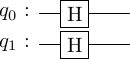

In [4]:
grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.draw(output='latex')

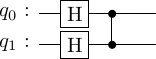

In [5]:
grover_circuit.cz(0,1) # Oracle
grover_circuit.draw(output='latex')

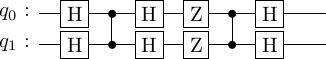

In [6]:
# Diffusion operator (U_s)
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw(output='latex')

In [7]:
sv_sim = Aer.get_backend('statevector_simulator')
result = sv_sim.run(grover_circuit).result()
statevec = result.get_statevector()
from qiskit.visualization import array_to_latex
array_to_latex(statevec, prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

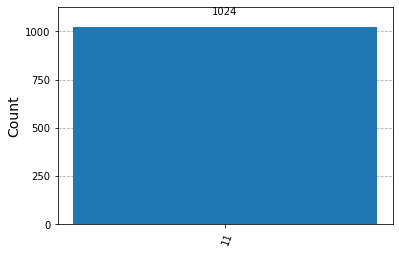

In [8]:
grover_circuit.measure_all()

qasm_sim = Aer.get_backend('qasm_simulator')
result = qasm_sim.run(grover_circuit).result()
counts = result.get_counts()
plot_histogram(counts)

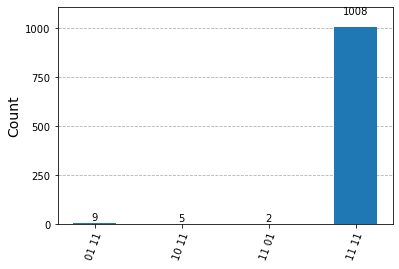

In [9]:
## We need this for "noisy simulation"
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)
from qiskit_aer.primitives import Estimator as AerEstimator
from qiskit.providers.fake_provider import GenericBackendV2

device = GenericBackendV2(3,seed=54)
noise_model = NoiseModel.from_backend(device)
grover_circuit.measure_all()

#qasm_sim = Aer.get_backend('qasm_simulator')
result = device.run(grover_circuit).result()
counts = result.get_counts()
plot_histogram(counts)